Consider the 2D Ising model in a square lattice $\Lambda$ with $100\times 100$ sites and periodic boundary conditions in the presence of an external magnetic field $B$.
The energy of the system for a given spin configuration $\sigma = \{\sigma_i\}_{i\in \Lambda}$ is
\begin{equation}
  E(\sigma) = -J\sum_{\langle ij\rangle} \sigma_i\sigma_j - B\sum_{i\in \Lambda} \sigma_i,
\end{equation}
where $\langle i j \rangle$ denotes two adjacent sites (with no double counting), $J$ is the spin-spin interaction, and $\sigma_i \in \{ -1, +1\}$ is the spin at site $i$.

The magnetization of the system is
\begin{equation}
  M(\sigma) = \frac{1}{|\Lambda|}\sum_{i\in \Lambda} \sigma_i.
\end{equation}


Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising model at different temperatures $T$ and magnetic field strengths $B$.
Discuss your strategy for determining the initial configuration, burn-in steps, total number of steps, and thinning (if any).


In [5]:
N = 100
J = 1
KB = 1
B = 0.1
steps = 200_000


def MCMC(lattice_spins, temp, steps, B):
    m_values = []
    t = 0
    while t < steps:
        i, j = np.random.randint(N), np.random.randint(N)
        delta_energy = 0
        for k, l in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
            i_neigh = i + k if i + k < N else 0
            j_neigh = j + l if j + l < N else 0
            delta_energy += -J * -2 * lattice_spins[i, j] * lattice_spins[i_neigh, j_neigh]
            delta_energy += 2 * B * lattice_spins[i, j]
        if delta_energy <= 0:
            lattice_spins[i, j] *= -1
        elif delta_energy > 0:
            prob = np.exp(-delta_energy / (KB * temp))
            if np.random.random() < prob:
                lattice_spins[i, j] *= -1
        else: 
            continue
        m_values.append(np.mean(lattice_spins))
        t += 1
    return m_values

In [23]:
#try different value of temperature and magnetic field
temp = 2
B = 0.1

In [24]:
lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values_rand = MCMC(lattice_spins, temp, steps, B)

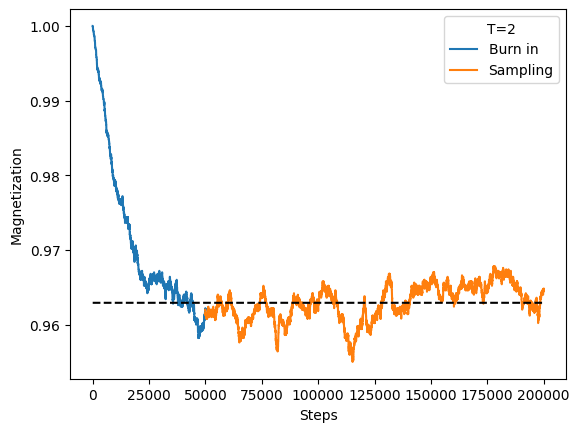

In [27]:
burnin_up = 50_000
m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.figure()
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burn in")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"T={temp:.0f}")
plt.show()

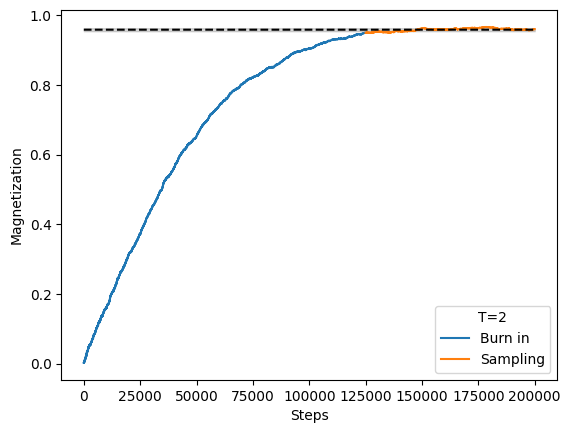

In [26]:
burnin_rand = 125_000
m_mean_rand = np.mean(m_values_rand[burnin_rand:])
m_std_rand = np.std(m_values_rand[burnin_rand:])
plt.figure()
plt.plot(range(steps)[:burnin_rand], m_values_rand[:burnin_rand], label="Burn in")
plt.plot(range(steps)[burnin_rand:], m_values_rand[burnin_rand:], label="Sampling")
plt.plot(range(steps), m_mean_rand * np.ones((steps)), "--", color="black")
plt.fill_between(range(steps), m_mean_rand - m_std_rand, m_mean_rand + m_std_rand, color="gray", alpha=0.3)
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"T={temp:.0f}")
plt.show()